In [1]:
file_name="../../../../OneDrive - Western Michigan University/machine learning/project/datasets/"+"/combined_OR_Style.csv"


In [3]:
import pandas as pd
df_combined = pd.read_csv(file_name,low_memory=False)

In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168726 entries, 0 to 7168725
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   State               object 
 1   Vehicle Make        object 
 2   Vehicle Model       object 
 3   Vehicle Model Year  float64
dtypes: float64(1), object(3)
memory usage: 218.8+ MB


# State Analysis

<Axes: ylabel='count'>

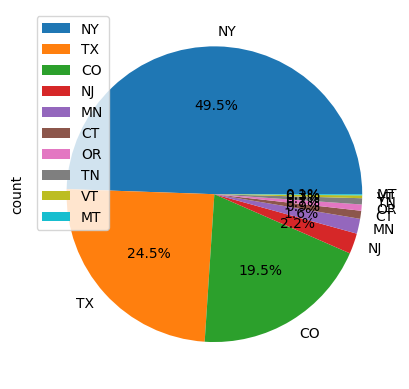

In [13]:
# pandas pie chart with percenatges
df_combined["State"].value_counts().plot(kind="pie",autopct='%1.1f%%',legend=True)
# df_combined["State"].value_counts().plot(kind="pie")

<Axes: xlabel='State'>

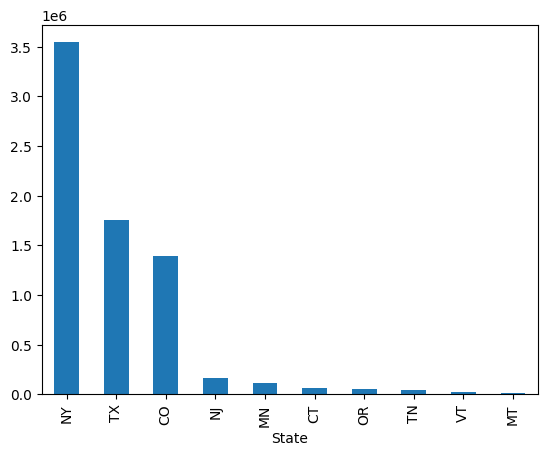

In [14]:
# pandas bar chart
df_combined["State"].value_counts().plot(kind="bar")

 # Vehicle make